# 3.평가

## 정확도(Accuracy)

In [2]:
from sklearn.metrics import accuracy_score

y_true = [1,0,1,1,0,1] # 실제 결과값
y_pred = [1,0,1,0,0,1] # 실전에서는 모델의 결과값. 총 6명의 데이터를 받아서 넣은 것.

accuracy_score(y_true,y_pred)

0.8333333333333334

# Precision(정확도)

In [3]:
from sklearn.metrics import precision_score

precision_score(y_true,y_pred)

1.0

# Recall(재현율)

진짜 정답 중 내가 몇 개를 맞췄는 지

In [4]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred)

0.75

# F1-Score(조화평균)

In [5]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred)

0.8571428571428571

# 혼동행렬(Confusion Matrix)

분류 모델에서만 사용

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true,y_pred)

array([[2, 0],
       [1, 3]])

In [7]:
# 통합 버전

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



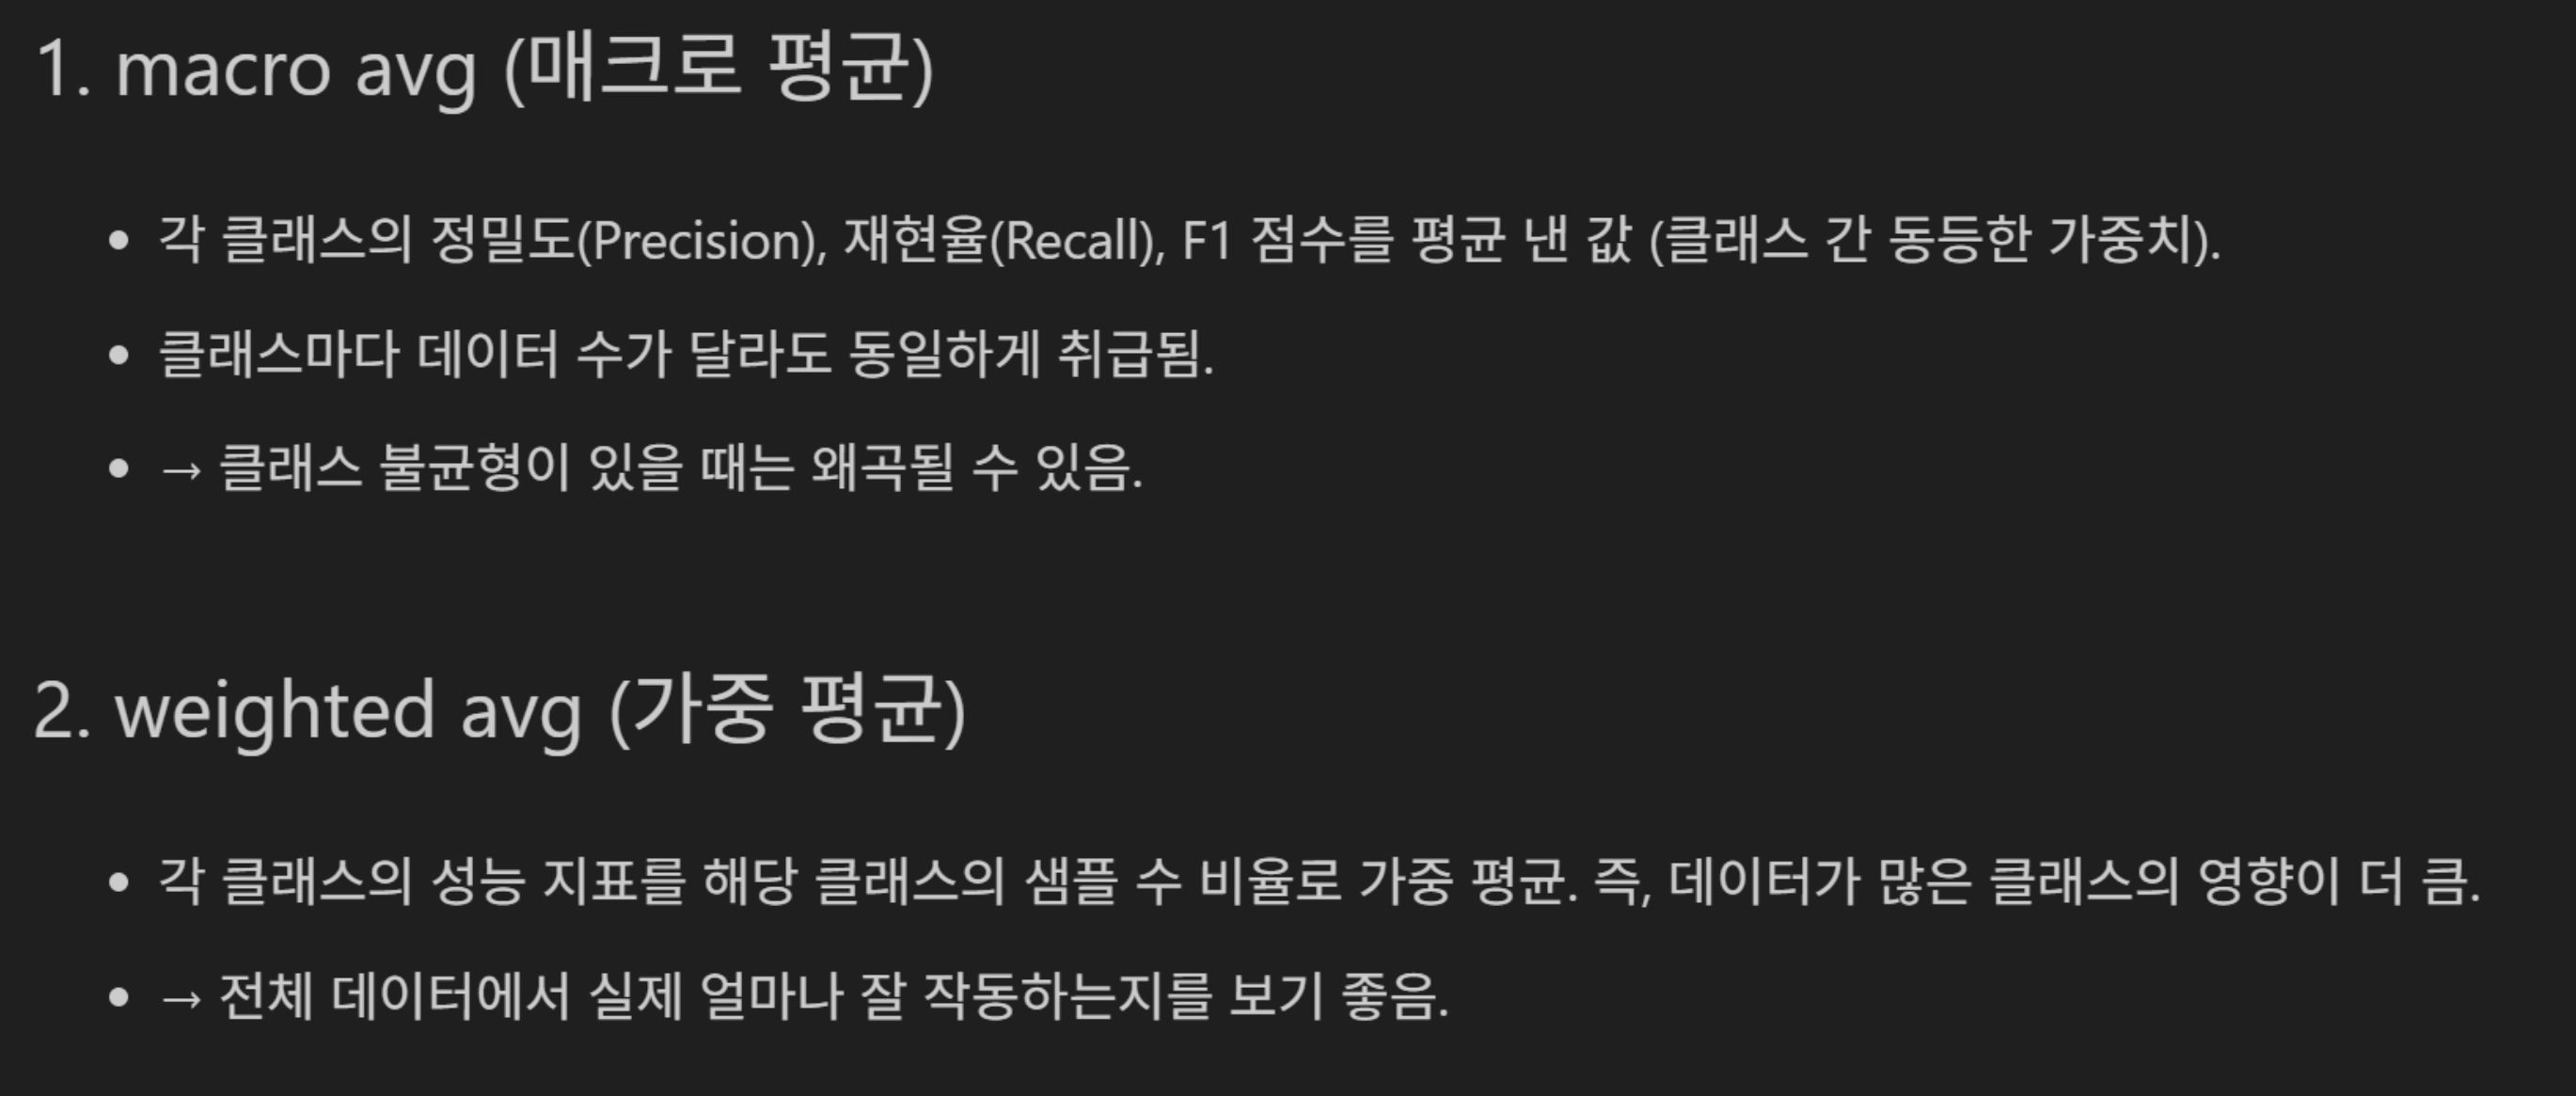

# 4.분류

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 모델 학습

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200) # 학습하는 횟수 # 여기서 iter은 하이퍼 파라미터
# 파라미터는 내가 관여할 수 없음. 하지만 내가 지정해줄 수 있는 하이퍼 파라미터
model.fit(X_train,y_train) # 최적의 파라미터값을 찾음


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## 예측 및 평가

In [12]:
from sklearn.metrics import accuracy_score, classification_report # support 는 갯수 0번 클래스는 10개, 1번 클래스는 9개
# weighted avg 지표가 더 중요. 보고서 제출할 때, 좀 더 이쁘게 시각화해서 올리면 좋음.

y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [13]:
# 함수 설정
# 이제 모델 종류만 바꿔서 돌리면 됨.

def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred,y_test))

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
train_model(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [15]:
from sklearn.ensemble import RandomForestClassifier # 과적합을 줄이기 위해 앙상블 기법 사용

model = RandomForestClassifier(n_estimators=1000,random_state=42) #n_estimators=100 는 나무 갯수. 하이퍼 파라미터이기 때문에 최적의 갯수를 찾기위해 노가다 해야됨
train_model(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Regression(회귀)

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
## 실전 버전
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [19]:
from sklearn.model_selection import train_test_split

X = housing.data
y = housing.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 무조건 랜덤이라 startify 는 쓰지않음

In [ ]:
from sklearn.linear_model import LinearRegression

model  = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred

model.coef_ # 회귀계수 값(선형 관계를 나타낼 때 얼마만큼의 기여를 하는 지)
# 순서는 df의 feature 차례대로 보면 됨.

# 상관관계를 보고 음의 값이 나왔다고 해도 안좋은 것이 아니다. 성능이 잘 안나올 경우 회귀 계수 확인

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #MSE 평균 제곱 오차, MAE: 평균 절대 오차, 
# r2 score 가 1에 근접하면 근접할수록 더 좋은 모델이라고 판단 할 수 있다. 

print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.5558915986952425
0.5332001304956989
0.33767016589310306


## L2 규제

In [22]:
from sklearn.linear_model import Ridge # L2 규제를 적용한 것 # L1은 절댓값 

model = Ridge(alpha=0.1) # 알파값을 조절하여 최적의 값 찾기
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

0.5558827543113785
0.5332005104154742
0.3376628074272916


In [23]:
from sklearn.linear_model import Lasso # r2 계수가 -이기 때문에 이건 그냥 갖다 버리기?

model = Lasso(alpha = 0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(r2_score(y_test, y_pred)) # 이게 맞음

0.6135115198058129
0.5816074623949868
0.5318167610318161
